In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('heart_data.csv')
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Criando coluna com vetorizacao

df['imc'] = 10000 * df['weight'] / (df['height'] * df['height'])
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [6]:
# Criando coluna sem vetorizacao (exemplo 1)

def calc_imc(row):
    return 10000 * row['weight'] / (row['height'] * row['height'])

df['imc2'] = df.apply(calc_imc, axis = 1)

In [7]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc,imc2
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,21.967120
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,34.927679
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,23.507805
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,28.710479
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,23.011177


In [8]:
# Criando coluna sem vetorizacao (exemplo 2)

imc_list = []

for i, row in df.iterrows():
    imc = 10000 * row['weight'] / (row['height'] * row['height'])
    imc_list.append(imc)

df['imc3'] = imc_list

In [9]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc,imc2,imc3
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,21.967120,21.967120
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,34.927679,34.927679
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,23.507805,23.507805
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,28.710479,28.710479
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,23.011177,23.011177


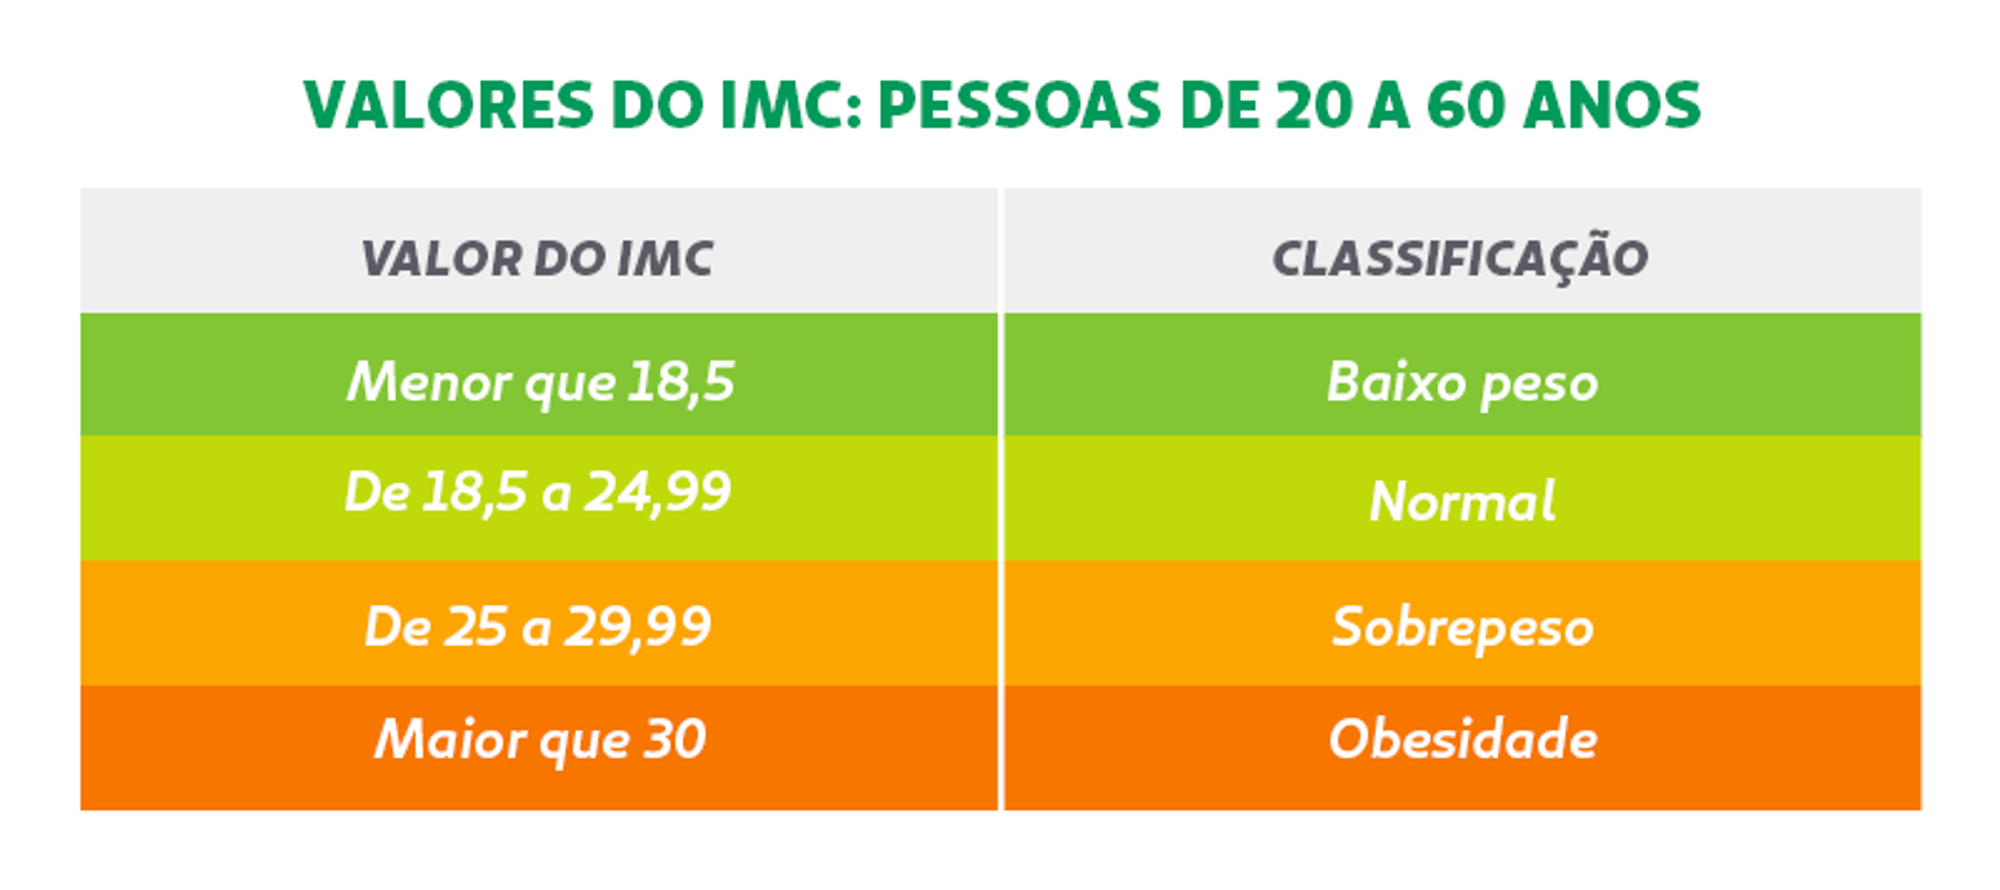

In [13]:
import numpy as np

condicoes = [
    (df['imc'] < 18.5),
    ((df['imc'] >= 18.5) & (df['imc'] < 25)),
    ((df['imc'] >= 25) & (df['imc'] < 30)),
    (df['imc'] >= 30)
]

classificacao = ['baixo_peso', 'normal', 'sobrepeso', 'obesidade']

df['class_imc'] = np.select(condicoes, classificacao, default = np.nan)

In [14]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc,imc2,imc3,class_imc
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,21.967120,21.967120,normal
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,34.927679,34.927679,obesidade
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,23.507805,23.507805,normal
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,28.710479,28.710479,sobrepeso
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,23.011177,23.011177,normal


In [15]:
# Sem uso de numpy

def classif_imc(df):
    if(df['imc'] <= 18.5):
        return 'baixo_peso'
    elif (df['imc'] <= 18.5) and (df['imc'] < 25):
        return 'normal'
    elif (df['imc'] <= 25) and (df['imc'] < 30):
        return 'sobrepeso'
    elif (df['imc'] >= 30):
        return 'obesidade'
df['class_imc2'] = df.apply(classif_imc, axis = 1)

In [16]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc,imc2,imc3,class_imc,class_imc2
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,21.967120,21.967120,normal,sobrepeso
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,34.927679,34.927679,obesidade,obesidade
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,23.507805,23.507805,normal,sobrepeso
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,28.710479,28.710479,sobrepeso,None
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,23.011177,23.011177,normal,sobrepeso
